# Modelo Supervisado

* Carlos Mario Estrada Puerta
* Manuel David Marin Gallego
* David Velasquez Mejia
* Daniela Higuita Alcaraz
* Jose Angel Salazar Hernandez

A continuación, se leerá un dataset de hongos que se encuentra en la carpeta "datos".

In [1]:
# Paquetes necesarios para la manipulación de los datos
import pandas as pd
from sklearn.metrics import auc
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split    
from sklearn.metrics import precision_score, mean_squared_error, confusion_matrix, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

Una vez leídos los paquetes necesarios para manipular los datos, entre ellos se encuentra pandas y sklearn, debe leerse el dataset de mushrooms.

In [2]:
dataframe = pd.read_csv("datos/mushrooms.csv", sep=",")

Probemos que haya sido leído, imprimamos la información, para no utilizar espacio del notebook innecesariamente, solo será impresa la cola del dataset(si se quiere leer la parte superior, se utiliza "head").

In [3]:
#dataframe.head()
dataframe.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


### Es importante conocer los datos con los que se está trabajando.

Por tanto, es sugerible imprimir las columnas de nuestro dataset y adicionalmente, conocer las dimensiones del mismo.

In [4]:
#Nombres de las características de éste dataset
dataframe.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [5]:
#(Número de datos, Número de características) ó (filas,columnas)
dataframe.shape

(8124, 23)

Una de las columnas es la clase "class", es muy importante conocerla dado que corresponde a los datos Y del dataset (lo que busca predecirse a partir del conjunto de datos X y el modelo escogido).

In [6]:
#Mostrar las clases del dataset
set(dataframe["class"])

{'e', 'p'}

En este caso específico, este dataset requiere clasificación de tipo binario.

## Normalización o escalamiento.

Una vez conocidos los datos, hay que realizar un proceso de escalamiento. Consiste en llevar todos los datos numéricos en el rango [0,1].

Aunque existen múltiples scaler (MinMax, standard, etc) en este caso específico, escogeremos MinMax.

In [7]:
#Seleccionar el scaler
scaler = MinMaxScaler()

## ¡La clase NO debe normalizarse!

Por lo tanto, antes de normalizar los datos utilizando el scaler, separaremos los datos de entrada "X" y los datos reales "Y" o clase.

In [8]:
X_dataframe = dataframe.drop("class", axis=1)
Y_dataframe = dataframe["class"]

Para estar seguros, imprimamos X_dataframe y Y_dataframe.

In [9]:
X_dataframe.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [10]:
Y_dataframe.head()

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object

### Label Encoding

In [11]:
le = preprocessing.LabelEncoder()

X_dataframe_lab = X_dataframe.apply(le.fit_transform)

## Ahora, se escalan los datos X_dataframe.

In [12]:
X_dataframe_scaled = scaler.fit_transform(X_dataframe_lab)

Una vez escalados, son convertidos en un array, volvamos esta información un dataframe de pandas y procedamos a trabajar con él.

In [13]:
X_dataframe_scaled = pd.DataFrame(X_dataframe_scaled, columns = X_dataframe_lab.columns)

Una vez más, imprimamos los datos para verificar que estén en el rango [0,1].

In [14]:
X_dataframe_scaled.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1.0,0.666667,0.444444,1.0,0.750,1.0,0.0,1.0,0.363636,0.0,...,0.666667,0.875,0.875,0.0,0.666667,0.5,1.0,0.250,0.6,0.833333
1,1.0,0.666667,1.000000,1.0,0.000,1.0,0.0,0.0,0.363636,0.0,...,0.666667,0.875,0.875,0.0,0.666667,0.5,1.0,0.375,0.4,0.166667
2,0.0,0.666667,0.888889,1.0,0.375,1.0,0.0,0.0,0.454545,0.0,...,0.666667,0.875,0.875,0.0,0.666667,0.5,1.0,0.375,0.4,0.500000
3,1.0,1.000000,0.888889,1.0,0.750,1.0,0.0,1.0,0.454545,0.0,...,0.666667,0.875,0.875,0.0,0.666667,0.5,1.0,0.250,0.6,0.833333
4,1.0,0.666667,0.333333,0.0,0.625,1.0,1.0,0.0,0.363636,1.0,...,0.666667,0.875,0.875,0.0,0.666667,0.5,0.0,0.375,0.0,0.166667


# División en conjuntos de entrenamiento y pruebas.

La primera consideración que debe hacerse es, ¿Con cuántos datos cuento?, efectivamente tenemos 768 datos y 9 características distintas, por lo tanto, lo mejor es optar por una división tipo 80-20.

Utilizando el dataframe obtenido tras normalizar (recordemos que podemos utilizar los mismos datos para Y dado que la clase no recibió ningún tipo de tratamiento), redefinimos X_dataframe & Y_dataframe.

In [15]:
#Antes de realizar una división 80-20, definir los conjuntos X & Y.

X_dataframe = X_dataframe_scaled
Y_dataframe = dataframe["class"]

Verificar que tengan el mismo numero de filas es importante.

También es sugerible imprimir X_dataframe & Y_dataframe en caso de no saber si están correctos los conjuntos de trabajo.

In [16]:
if X_dataframe.shape[0] == Y_dataframe.shape[0]:
    print("El número de filas coinciden, ¡Es correcto!")


El número de filas coinciden, ¡Es correcto!


Finalmente, debe realizarse la división de los datos, utilizando la función "split".

In [17]:
X_train_dataframe, X_test_dataframe, y_train_dataframe, y_test_dataframe = train_test_split(X_dataframe, Y_dataframe, test_size=0.20)

Nótese que el "test_size" es 0.20, lo que coincide con la teoría.

Por otro lado, esta función le da valores de prueba y entrenamiento distintos cada vez que el código es utilizado, por lo tanto, no debe sorprenderse si hay variaciones en los conjuntos, lo que se mantendrá constante es la proporción entre éstos.

# Modelos de clasificación.

Tal como se sugiere, el primer modelo de clasificación que se utilizará será la Regresión Logística.

Posteriormente se observará la matriz de confusión asociada y las métricas derivadas de ésta.

In [18]:
#Regresión Logística con sklearn
regresion_logistica = linear_model.LogisticRegression()

Ahora, ajustemos los datos al modelo. Nótese que se utilizan los conjuntos X e Y de entrenamiento.

In [19]:
regresion_logistica.fit(X_train_dataframe, y_train_dataframe)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Una vez ajustado el modelo, observemos los resultados obtenidos.

Esta primer pincelada puede darse reportando el <i><b> error de entrenamiento </b></i> y el <i><b> error de pruebas. </b></i>

Para ello, realizaremos predicciones sobre el conjunto de pruebas(X_test_dataframe) y entrenamiento (X_train_dataframe) y calcularemos su "accuracy_score" respecto de los conjuntos de entrenamiento y prueba del conjunto Y (datos reales).

In [20]:
y_pred_train = regresion_logistica.predict(X_train_dataframe)
efectividad_entrenamiento = accuracy_score(y_train_dataframe, y_pred_train)
print("Precisión de entrenamiento = " + str(efectividad_entrenamiento))

Precisión de entrenamiento = 0.9461455608555163


In [21]:
y_pred_test = regresion_logistica.predict(X_test_dataframe)
efectividad_pruebas = accuracy_score(y_test_dataframe, y_pred_test)
print("Precisión de pruebas: " + str(efectividad_pruebas))

Precisión de pruebas: 0.9476923076923077


¿El modelo es un buen clasificador? ¿Esta sobre ajustado, bien o subajustado?

# Matriz de confusión

Ahora, se realizará la implementación de la matriz de confusión del modelo de Regresión Logística que se planteó con anterioridad.

Nótese que ésta visualización permite encontrar métricas estadísticas y matemáticas para medir el desempeño del modelo, al mismo tiempo que deja ver si el éste está confundiendo una clase con otra.

No necesariamente es de carácter binario, por lo cual es flexible a distintos tipos de clasificación.

Es una comparación entre valores reales y valores predichos.

<center> <img src = "res/matriz.png"> </center>

A continuación, se utiliza "confusion_matrix" de sklearn.metrics para reportar esta información.

In [22]:
matriz_confusion = confusion_matrix(y_test_dataframe, y_pred_test, labels=["p", "e"])

# Para mostrar de mejor forma la matriz
table = pd.DataFrame(matriz_confusion)
table.columns = ["tested_negative", "tested_positive"]
table.index = ["tested_negative", "tested_positive"]
print(table)

                 tested_negative  tested_positive
tested_negative              735               58
tested_positive               27              805


Como puede observarse, este modelo presenta un problema con el dataset, dado que en 31 casos donde el paciente si sufre la enfermedad, los clasifica como negativos.

A continuación se pueden describir las métricas vistas en clase, especialmente útiles cuando los datos estan desbalanceados. 

Los Falsos Positivos(FP), Falsos Negativos (FN), Verdaderos Positivos (VP) y Verdaderos Negativos (VN), que adquieren sentido cuando se trata de un problema de clasificación binaria.

In [23]:
VN, FP, FN, VP = matriz_confusion.ravel()

Pueden imprimirse los valores correspondientes a VN, FP, FN y VP para corroborar que la información sea correcta en éstos. O bien, entender a qué corresponden.

# Métricas

### Precisión del modelo:

$$P = \frac{VerdaderoPositivo}{VerdaderoPositivo + FalsoPositivo}$$

Probabilidad de que el modelo no marque como positivo, una muestra negativo.

In [24]:
P = VP/(VP+FP)
print("La precisión del modelo es: " + str(P))

La precisión del modelo es: 0.93279258400927


### Sensibilidad(Recall) del modelo:

$$R = \frac{VerdaderoPositivo}{VerdaderoPositivo + FalsoNegativo}$$

Capacidad del modelo de encontrar los valores positivos.

In [25]:
R = VP/(VP+FN)
print("La sensibilidad del modelo es: " + str(R))

La sensibilidad del modelo es: 0.9675480769230769


### Especificidad del modelo:

$$E = \frac{VerdaderoNegativo}{VerdaderoNegativo + FalsoPositivo}$$

Capacidad del modelo de encontrar elementos negativos.

In [26]:
E = VN/(VN+FP)
print("La especificidad del modelo es: " + str(E))

La especificidad del modelo es: 0.926860025220681


### F1 Score:



$$F1\_score = \frac{2 * P * R}{P + R}$$

Promedio entre precisión y sensibilidad, que da igual importancia a ambos valores.


In [27]:
F = (2*P*R)/(P+R)
print("El F1-Score del modelo es: " + str(F))

El F1-Score del modelo es: 0.9498525073746312


## El caso multi-clase.

Si se encuentra un problema multi-clase, pueden utilizarse estas versiones del código.

precision_score, recall_score, fbeta_score de la librería sklearn.metrics.

### AUC (Area Under Curve)

Para modelos de clasificación binaria únicamente, como la Regresión Logística, puede definirse un threshold, tal que diferencie valores verdaderos o falsos.

El umbral es muy importante, si es muy cercano a cero (como 0.1) el sistema tiende a clasificar todo como positivo, si es cercano a 1 (como 0.9) los objetos clasificados serán casi todos negativos y finalmente, si el umbral es 0.5 tenderá a clasificar todo por igual.

Así mismo, para la métrica AUC se busca obtener valores asociados a la Sensibilidad $S$ y la Especificidad $E$, posteriormente construir el gráfico $S$ vs $1-P$.

A continuación, se implementa el AUC para el modelo Regresión Logística aplicado al dataset de mushrooms normalizado.

In [28]:
# Calculo del valor x para el caso de la regresión logistica
y_score = regresion_logistica.decision_function(X_test_dataframe)

In [29]:
fpr, tpr, thresholds = roc_curve(y_test_dataframe, y_score, pos_label="tested_positive")
print("Los thresholds son: \n")
print(thresholds)
print("Los valores de sensibilidad son: \n")
print(tpr) # imprimir la sensibilidad
print("Los valores de especificidad son: \n")
print(1-fpr) # imprimir la especificidad

Los thresholds son: 

[  9.4582801    8.4582801  -11.04613011]
Los valores de sensibilidad son: 

[nan nan nan]
Los valores de especificidad son: 

[1.         0.99938462 0.        ]


En el código anterior, se calculas varios valores de umbral (thresholds), cada uno acompañado de la sensibilidad (tpr) y el valor de 1-especificidad (fpr) que arrojaría la matriz de confusión de ese umbral.

### Finalmente, se muestra la curva ROC y la comparación con la peor configuración posible existente, con matplotlib.

Text(0.5, 1.0, 'AUC')

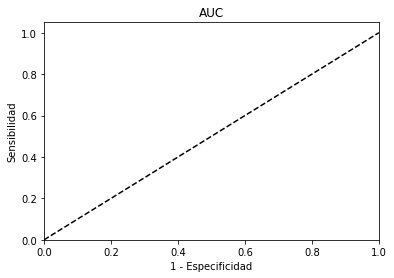

In [30]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Especificidad')
plt.ylabel('Sensibilidad')
plt.title('AUC')

Ahora, el objetivo es calcular el AUC de la curva ROC, área que representa una medida de qué tan bueno o malo es el modelo estudiado. Entre mayor sea(cercano a 1), mucho mejor será el modelo.

### Nota: 
Si un modelo se acerca a la linea punteada(AUC cercano a 0), significa que es un <i><b>MUY MAL</b></i> modelo.

In [31]:
print("El área bajo la curva del modelo es: ")
auc(fpr, tpr)

El área bajo la curva del modelo es: 


nan

# Modelo no Supervisado

In [32]:
#Importar librerías
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
import sklearn.cluster as cluster
import time

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (12, 5)
plt.style.use('ggplot')

Using TensorFlow backend.


In [33]:
le = preprocessing.LabelEncoder()

dataframe = pd.read_csv("datos/mushrooms.csv", sep=",")

df_num = dataframe.apply(le.fit_transform)

In [34]:
df_num.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2
8123,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,4,1,2


In [35]:
X = np.array(df_num)
y = np.array(df_num['class'])
X.shape

(8124, 23)

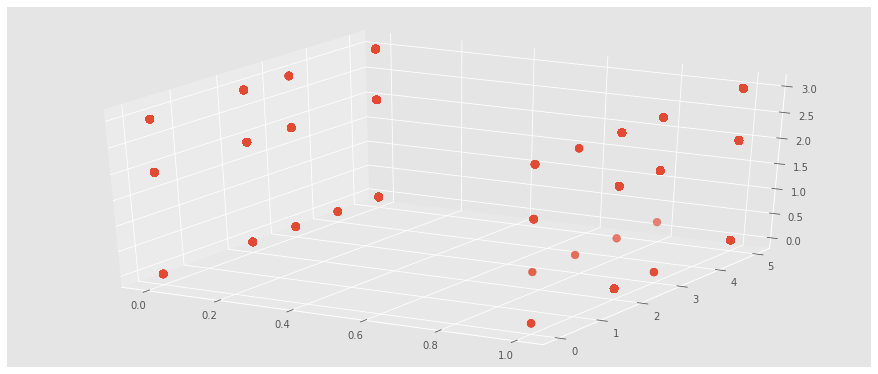

In [36]:
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(X[:, 0], X[:, 1], X[:, 2],s=60)

### Ejecutando K-Means

Se ejecuta entonces el algoritmo para 10 clusters y se obtienen las coordenadas de sus centroides

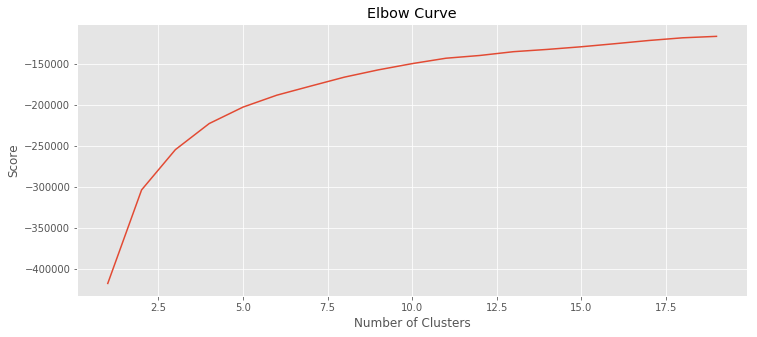

In [37]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

### Centroides

In [38]:
kmeans = KMeans(n_clusters=10).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 1.00000000e+00  3.50000000e+00  1.50000000e+00  3.00000000e+00
  -4.55191440e-15  2.00000000e+00  1.00000000e+00  2.55351296e-15
  -2.44249065e-15  3.88461538e+00 -6.43929354e-15  1.00000000e+00
   1.00000000e+00  1.00000000e+00  3.23076923e+00  3.23076923e+00
   0.00000000e+00  2.00000000e+00  1.00000000e+00  2.00000000e+00
   1.00000000e+00  4.50000000e+00  1.66666667e+00]
 [ 2.85517241e-01  2.96551724e+00  2.20965517e+00  8.14344828e+00
   7.93103448e-01  2.21379310e+00  1.00000000e+00  1.51724138e-01
   2.24827586e-01  3.62344828e+00  8.82758621e-02  1.82482759e+00
   1.87448276e+00  1.92000000e+00  6.95172414e+00  6.95172414e+00
   0.00000000e+00  2.00000000e+00  1.08827586e+00  3.87448276e+00
   2.78896552e+00  3.02068966e+00  1.82344828e+00]
 [ 1.17082534e-01  3.46257198e+00  1.60556622e+00  2.97504798e+00
   9.39539347e-01  4.76967370e+00  9.61612284e-01  7.67754319e-03
   5.27831094e-02  9.59500960e+00  8.91554702e-01  1.03934741e+00
   1.93857965e+00  1.93282150e+00  5.537

### Grafica de clusters

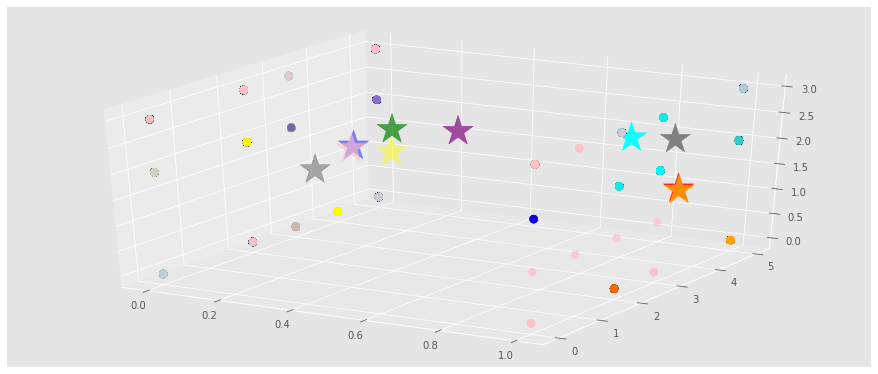

In [39]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow','black','orange','pink','purple','gray']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)